# EDA-2. Математическая статистика в контексте EDA

## 1. Введение

В предыдущем модуле мы узнали, что такое разведывательный анализ данных и как он может улучшать качество моделей машинного обучения. Возникает вопрос: а для чего нам в разведывательном анализе статистика?

Статистика очень тесно связана с машинным обучением. Этот раздел математики помогает ответить, какие из признаков важны, позволяет выдвигать и проверять гипотезы и идеи. Статистика лежит в основе алгоритмов машинного обучения, методов разведывательного анализа данных. С элементами математической статистики мы столкнёмся в каждом модуле этого курса.

Для начала давайте разберёмся с тем, что такое математическая статистика.

Математическая статистика — раздел математики, который занимается систематизацией и обработкой данных для их использования и получения выводов.

Данные, собранные в ходе исследования каких-то явлений или процессов, сами по себе не очень информативны. Чтобы извлечь из данных какие-то полезные идеи, применяется описательная статистика, которую мы и будем изучать в этом модуле.

Например, мы исследуем, от каких факторов зависит удовлетворенность жизнью, имея на руках информацию о доходах населения. Сами по себе эти данные мало что дают. 

Проанализировав этот признак, с помощью знаний описательной статистики мы получим примерно такие статистические данные:

* средний доход;  
* средний доход в регионе проживания;  
* средний доход в разрезе пола;  
* разница между минимальным и максимальным доходом;  
* а также другие показатели, которые могут охарактеризовать доход человека более детально. 

После извлечения идей мы получаем статистические данные.

Статистические данные — упорядоченные, классифицированные данные о каком-то явлении или процессе.

Так как в процессе получения статистических данных появляются новые признаки, то этот процесс касается не только математической статистики, но и проектирования признаков — ещё одной части разведывательного анализа данных, который будет изучен в следующем модуле. 

Прежде чем применять математические статистики к разведывательному анализу данных, необходимо изучить описательные статистики — с ними мы познакомимся в следующем юните. Без понимания этих основ будет невозможно двигаться дальше по всем этапам машинного обучения.

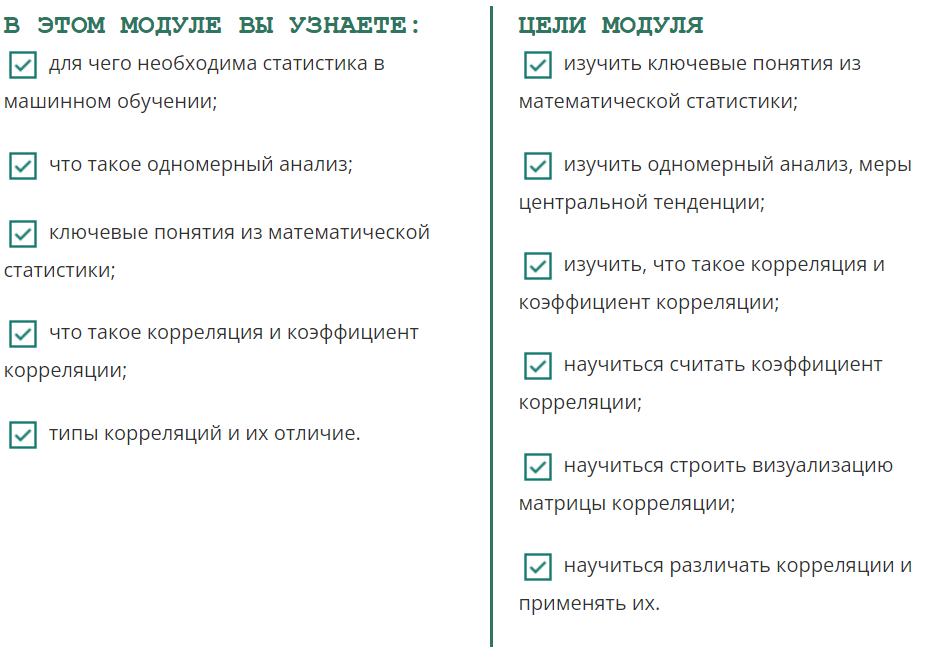

## 2. Описательная статистика. Меры центральной тенденции в Python

Когда вы описываете и вычисляете характеристики одной переменной, вы выполняете одномерный анализ. 

Например, вы хотите узнать больше о сомелье, которые давали подробный отзыв вину. Вы анализируете признак независимо от других, как будто в датасете не существует других признаков. Вы можете просмотреть, сколько сомелье приняло участие в обзоре вин. Можете проанализировать информацию и увидеть, какой сомелье чаще всего оценивал вино. Возможно, эта информация будет важна, и на этапе проектирования и преобразования признаков мы обработаем признаки на основе этих выводов. 

Когда вы анализируете пару переменных и больше, то вы делаете многомерный анализ. Целью такого анализа является нахождение связей между признаками. 

Мы можем проанализировать, есть ли связь между сортом винограда и ценой бутылки вина. Для этого используется корреляционный анализ, с которым мы познакомимся в следующем юните. Для оценки рейтинга вина можем оценить статистическую значимость переменных, которую мы изучим в следующих модулях. Например, если цена за бутылку вина окажется неважным признаком, то мы сможем удалить его из датасета, так как он не влияет на рейтинг вина.

К одномерному анализу вы можете отнести вычисление максимальных и минимальных значений какого-либо признака, вычисление средних значений, часто встречающихся значений и размаха. 

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Прочитаем наш файл с винными обзорами:
original_data = pd.read_csv('data/wine_cleared.csv')
df = original_data.copy()

### Задание 2.1

Вычислите наименьший балл за вино в датасете.

In [29]:
df['points'].min()

80

## Задание 2.2

Вычислите наименьшую цену за бутылку в наборе данных.

In [30]:
df['price'].min()

4.0

Вычисление среднего также относится к одномерному анализу. Но что значит среднее?

Например, средняя зарплата в Краснодарском крае составляет 43 000 руб. Это число даёт нам представление о среднестатистическом жителе этого края. 

Но что здесь означает средняя зарплата и среднестатистический житель? Среднее арифметическое, середина распределения или что-то другое? Чтобы ответить на этот вопрос, нам необходимо знать, что такое мера центральной тенденции.

Мера центральной тенденции — это число, которое описывает так называемое «среднее» признака. Мера центральной тенденции может рассчитываться по-разному в зависимости от типа признака или от его распределения.

Далее мы рассмотрим наиболее популярные меры центральной тенденции, используемые в машинном обучении: среднее арифметическое, медиана, мода. Для расчёта этих описательных статистик в Python мы будем пользоваться библиотекой statistics https://docs.python.org/3/library/statistics.html. Она предоставляет готовые функции для вычисления математической статистики для числовых данных.

Установим библиотеку:

In [31]:
# %pip install statistics

Импортируем библиотеку для дальнейшего использования:

In [32]:
import statistics

СРЕДНЕЕ АРИФМЕТИЧЕСКОЕ

Среднее арифметическое — сумма всех элементов, поделённая на количество элементов в числовом ряду или признаке (Series).

### Задание 2.3

Вычислите среднюю стоимость бутылки вина при помощи функции statistics.mean() библиотеки statistics. Округлите значение до сотых.

In [33]:
round(statistics.mean(df['price']),2)

35.36

## Задание 2.4 (Самопроверка)

Вычислите среднюю стоимость бутылки вина при помощи стандартных функций Python.

Вставьте получившийся код:

In [34]:
mean = sum(df['price']) / len(df['price'])
mean

35.36338912999136

Среднее арифметическое хорошо работает для признаков с небольшим разбросом в значениях, например чтобы корректно вычислять средний возраст популяции. Однако оно плохо работает для признака с большим разбросом в значениях. 

Возьмём в пример рост человека. Если в выборке попадутся игроки баскетбольной команды или карлики, представление о среднем росте человека сильно исказится. Если таких значений в выборке будет мало, скорее всего, они будут обработаны на этапе очистки данных от выбросов. Если после очистки данных большой разброс останется, вы можете снова вернуться к этому этапу, так как цикл машинного обучения не линеен, или использовать другую описательную статистику для получения среднего значения.

МЕДИАНА

Медиана — средний элемент распределения. Для расчёта медианы должно выполняться одно условие: числовой ряд должен быть предварительно отсортирован. Только так мы сможем корректно рассчитать средний элемент. Признак может быть отсортирован как по возрастанию, так и по убыванию. 

Методы современных библиотек, в том числе и используемой нами statistics для вычисления медианы, самостоятельно выполняют сортировку данных — вам не нужно заботиться об этом. 

Если количество элементов чётное, медианой будет среднее арифметическое двух средних элементов распределения.

### Задание 2.5

Вычислите медиану стоимости бутылки вина при помощи функции statistics.median() библиотеки statistics. Округлите значение до сотых.

In [35]:
round(statistics.median(df['price']),2)

28.0

### Задание 2.6

Вычислите медиану стоимости бутылки вина при помощи стандартных функций Python.

Вставьте получившийся код:

In [36]:
df['price'].median()

28.0

In [37]:
count_price = len(df['price']) # количество записей цен
sorted_price = sorted(df['price']) # отсортированные цены

if count_price % 2: # при нечетном кол-ве элементов выбираем средний по индексу 
    median = sorted_price[round(0.5*(count_price-1))]
else: # при четном кол-ве элементов выбираем 2 средних по индексу и считаем между ними среднее арифметическое
    index = round(0.5 * count_price)
    median_ = 0.5 * (sorted_price[index-1] + sorted_price[index])
median

28.0

В отличие от среднего арифметического медиана хорошо справляется с разбросом в значениях, поэтому её чаще используют. Также медиана разбивает данные на две группы, состоящие из одинакового количества элементов.

Средние значения, например уровень дохода или цена на недвижимость, часто вычисляются именно по медиане, потому что в этом случае важен средний уровень доходов большей части населения. 

В таком случае основатель Amazon Джефф Безосс с годовым доходом в несколько миллиардов не испортит нам всю статистику. 

Также в библиотеке statistics есть функции, связанные с медианой, — функция statistics.median_low() и функция statistics.median_high().

В случае, когда количество элементов в числовом ряду (серии) нечётное, функции возвращают то же, что и median().

В случае, когда количество элементов чётное, у нас получается два средних значения:

* median_low() возвращает меньшее из них;
* median_high() возвращает большее из них.

Примечание. Если в вашем наборе данных есть пропущенные значения, функции библиотеки statistics в отличие от других методов (например np.median() из библиотеки numpy) будут автоматически игнорировать пропущенные значения, не выдавая ошибку.

МОДА

Мода — самый часто встречающийся элемент в числовом ряду.

Допустим, вы решили полететь в отпуск со своими друзьями и решили выбрать месяц. Вы провели опрос, кому в какой месяц было бы удобнее. Месяцы в году — это числовой ряд от 1 до 12. Дима и Серёжа свободны в феврале. Толя может взять отпуск в любой месяц года, а Ксюша может только в июне. Как в этом случае поступите вы?

Очевидно, выберете месяц, который выбрало большинство; остальные подстроятся либо не полетят с вами.

Чаще всего мода используется в нечисловых рядах. Например самая популярная порода собак, фильм года, лучшие рестораны вычисляются именно модой.

### Задание 2.7

Вычислите моду стоимости бутылки (самую часто встречающуюся цену) вина при помощи функции statistics.mode() библиотеки statistics. Округлите значение до сотых.

In [38]:
round(statistics.mode(df['price']),2)

35.36

Моду также можно вычислить при помощи statistics.multimode(). В случае наличия нескольких модовых (популярных значений) функция statistics.mode() вернёт вам ошибку StatisticsError, а statistics.multimode() — список с всеми вычисленными модовыми значениями.

### Задание 2.8

Вычислите моду стоимости бутылки (самую часто встречающуюся цену) вина при помощи стандартных функций Python и pandas.

Вставьте получившийся код

In [39]:
mode = round(df["price"].value_counts().index[0],2)
mode

35.36

Мы рассмотрели самые основные и часто используемые в машинном обучении меры центральной тенденции. Также к мерам центральной тенденции относятся:

* среднее геометрическое;
* среднее гармоническое;
* средневзвешенное и другие.

Их также можно вычислить с помощью библиотеки statistics, но они реже используются для описания распределения в машинном обучении.

Такие более сложные описательные статистики, как стандартное отклонение, меры разброса, вы изучите в следующих юнитах, посвящённых математической статистике.

## 3. Корреляция

В прошлом юните мы рассмотрели вычисление максимального, минимального значения признака как вид одномерного анализа, а также меру центральной тенденции и её виды. В этом юните мы рассмотрим корреляционный анализ как один из часто применяемых средств многомерного анализа данных.

Корреляция — статистическая связь двух и более переменных. При изменении значения одной из переменных происходит закономерное изменение другой или других величин. 

Например, при взрослении у человека меняются его показатели: рост становится больше, риск сердечно-сосудистых заболеваний — выше.

Мерой связи величин, мерой корреляции является коэффициент корреляции. Он может принимать значение от -1 до +1.

Отрицательная корреляция, коэффициент корреляции < 0 говорит об обратной связи между переменными. При обратной связи увеличение одной из величин ведёт к закономерному уменьшению другой (других) величин. 

Например, чем больше сумма активного долга, тем меньше шанс в одобрении кредита.

Положительная корреляция, коэффициент корреляции > 0 говорит о прямой связи между переменными. При прямой связи увеличение одной из величин ведёт к закономерному увеличению другой (других) величин. 

Например, с увеличением возраста размер ноги человека увеличивается, и его рост увеличивается тоже.

Коэффициент корреляции = 0 говорит о том, что переменные независимы друг от друга, по крайней мере линейно, но это вовсе не значит, что между ними нет какой-то более сложной взаимосвязи. Это достаточно редкое явление, которое может встретиться на конкретном наборе данных.

Понимание корреляции приводит нас к понятию мультиколлинеарности — такой сильной зависимости переменных друг от друга, что она затрудняет анализ и оценку будущей модели машинного обучения. 

Понять, почему это плохо для модели машинного обучения, вы сможете, когда приступите к обучению моделей. Но уже на этапе разведывательного анализа данных вы сможете выявить такие зависимости.

Как понять, существует ли сильная взаимозавимость признаков? Для этого существует примерная шкала степеней силы связи и коэффициента корреляции между признаками.

В таблице отражены основные силы связи между признаками.

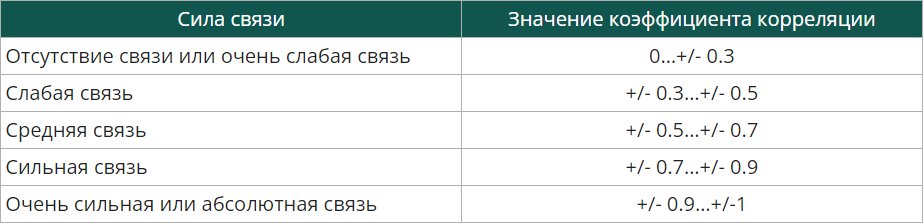

Принято считать, что при коэффициенте корреляции +/-0,7 связь между признаками сильная и приводит к мультиколлинеарности.

Например, сложилась ситуация, когда в датасете были обнаружены признаки с очень сильной корреляцией. Мы знаем, что мультиколлинеарность вредит такой модели, поэтому на этапе проектирования признаков можем объединить эту пару признаков в один или удалить из этой пары один — тот, что менее важен. Важность признаков мы оцениваем позже, на этапе отбора признаков.

Так что для этапа корреляционного анализа достаточно делать и запоминать выводы о взаимосвязях признаков, чтобы на дальнейшем этапе разведывательного анализа данных правильно их обработать. Эти этапы мы изучим позже в курсе, в юнитах про разведывательный анализ данных.

### Задание 3.3

Для расчёта коэффициента корреляции применим функцию df.corr() библиотеки pandas.

data.corr()

Вычислите коэффициент корреляции между переменными в датасете винных обзоров. В ответ запишите величину коэффициента корреляции между ценой за бутылку и баллами за вино. Округлите ответ до шести знаков после запятой.

In [40]:
round(df[{'price', 'points'}].corr(),6)

C:\Users\artem.truschelev\AppData\Local\Temp\ipykernel_19900\83961548.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  round(df[{'price', 'points'}].corr(),6)


,points,price
points,1.000000,0.402137
price,0.402137,1.000000


Результатом функции df.corr() является матрица корреляции. 

Матрица корреляции — таблица, заголовками и строками которой являются названия признаков в датасете. На пересечении строк и столбцов находится значение коэффициента корреляции этих двух признаков.

Данная матрица имеет значение 1 по главной диагонали, так как единица означает корреляцию признака с самим собой. Матрица является симметричной. 

На рисунке вы можете увидеть визуализированную матрицу к одному из соревнований на kaggle. Наибольшая связь наблюдается в паре признаков age и age_bucket — 0.98, что по шкале корреляции является очень сильной связью и приводит к мультиколлинеарности признаков. Скорее всего, один из признаков будет исключён из датасета.

Подобную матрицу мы научимся строить в одном из следующих юнитов, посвящённых визуализации корреляций.

В нашей матрице датасета винных обзоров отражено всего два признака — points, price.  На пересечении признаков мы видим значение коэффициента корреляции между признаками points и price.

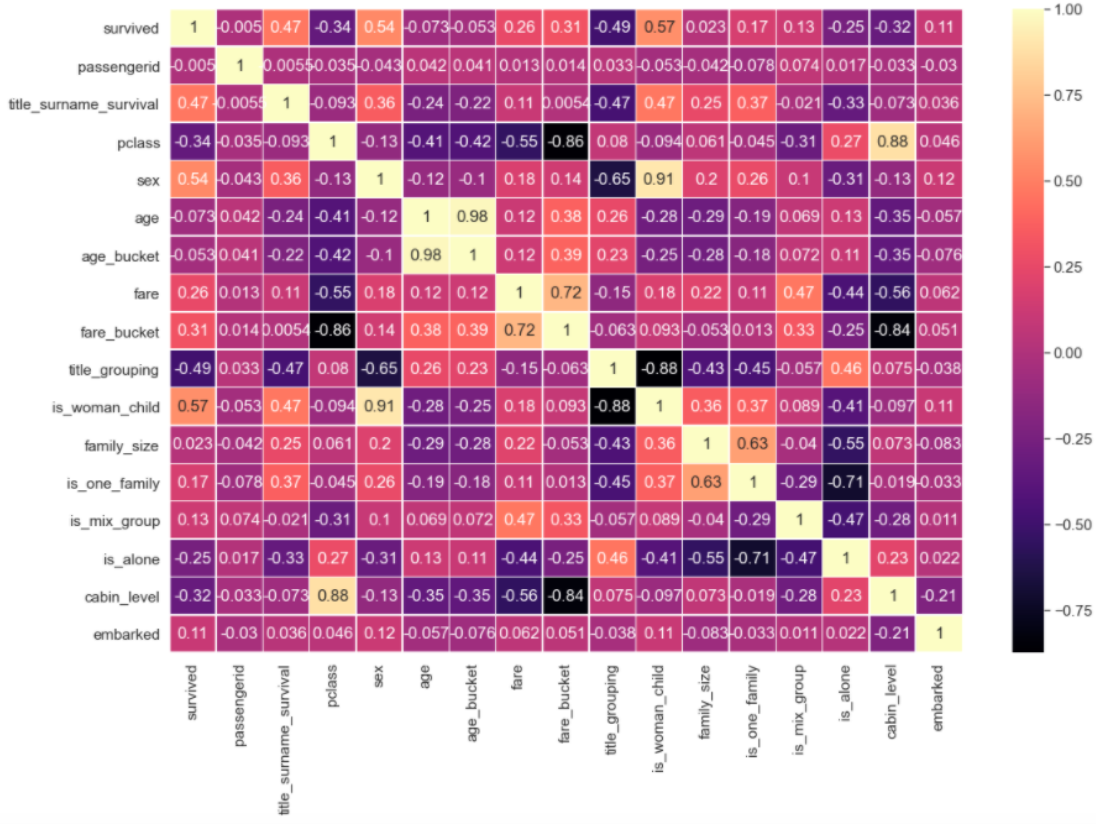

Причина в том, что рассчитать коэффициент корреляции мы можем только в том случае, когда признак имеет численное выражение. Как мы выяснили ранее, остальные признаки — в строковом формате, и расчёт коэффициента корреляции невозможен. Для этого необходимо провести кодирование признака, которое мы будем изучать далее.

Поскольку наша задача — предсказание рейтинга (баллов) за вино на основании признаков в датасете, можем ли мы с помощью корреляции понять, влияет ли, например, цена за бутылку в определении рейтинга вина?

Нет!

Корреляция и причинно-следственная связь — это понятия, которые чаще всего ошибочно приравниваются друг к другу. Понимание корреляции важно для разведывательного анализа и помогает делать правильные выводы. 

ЛОЖНАЯ КОРРЕЛЯЦИЯ

Рассмотрим, почему корреляция не подразумевает причинно-следственных связей, на популярном примере.

Продажи мороженого коррелируют с убийствами!

По мере роста или падения продаж замороженного десерта соответственно растёт или уменьшается количество убийств. Является ли потребление замороженного десерта причиной смерти людей?

Нет. Эти две вещи взаимосвязаны, но это не значит, что одна вызывает другую.

Этот случай можно назвать совпадением, и чаще всего корреляция наблюдается именно в таких ситуациях. А иногда нам просто не хватает данных, чтобы уловить причину связи между переменными.

В некоторых случаях участвуют скрытые факторы. Например, в примере с мороженым улучшение погоды вызывает рост продаж десерта, а большое количество людей на улицах создаёт благоприятные условия для убийц.

Нет причинно-следственной связи между убийствами и продажей мороженого, а наличие третьего фактора — хорошей погоды — объясняет эти связи. Этот случай называется ложной корреляцией.

Существует огромное количество подобных исследований с удивительными связями. Прочитайте, например, про связь пиратов с глобальным потеплением https://ru.wikipedia.org/wiki/%D0%9F%D0%B0%D1%81%D1%82%D0%B0%D1%84%D0%B0%D1%80%D0%B8%D0%B0%D0%BD%D1%81%D1%82%D0%B2%D0%BE#%D0%9F%D0%B8%D1%80%D0%B0%D1%82%D1%8B_%D0%B8_%D0%B3%D0%BB%D0%BE%D0%B1%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D0%BF%D0%BE%D1%82%D0%B5%D0%BF%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5. Больше исследований вы найдёте здесь https://www.tylervigen.com/spurious-correlations. 

## 4. Типы корреляций. Корреляция Пирсона

Аргумент method указывает на название используемого метода расчёта корреляции: 'pearson' — корреляция Пирсона, 'kendall' — корреляция Кендалла, 'spearman' — корреляция Спирмена. Каждый метод может быть применён для разных типов данных. Давайте разберёмся, чем отличаются эти методы и для каких типов данных применять каждый из них.

КОРРЕЛЯЦИЯ ПИРСОНА

Рассчитав в прошлом юните коэффициент корреляции между point и price, мы использовали df.corr(). Согласно документации, если не указать method, по умолчанию используется корреляция Пирсона. Верно ли это для наших признаков?

Коэффициент корреляции Пирсона используется для вычисления линейной взаимосвязи между признаками. 

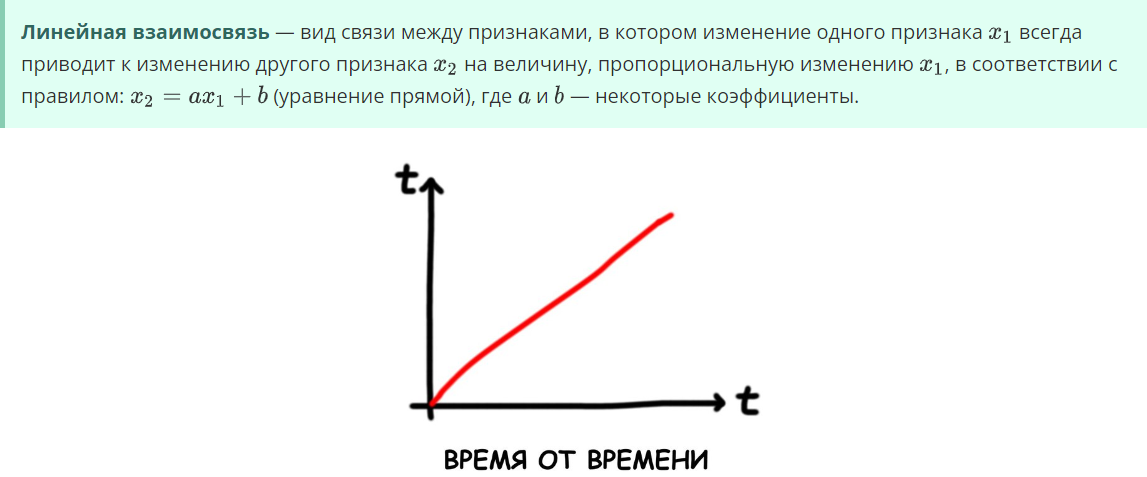

Определить существование линейной связи в паре признаков эмпирическим путем можно, если вы можете формулировать фразу про признаки: «С уменьшением/увеличением признака 1 уменьшается/увеличивается признак 2 в соответствии с некоторым уравнением прямой». 

Например, с увеличением возраста заёмщика уменьшается количество дней просрочки по кредиту. 

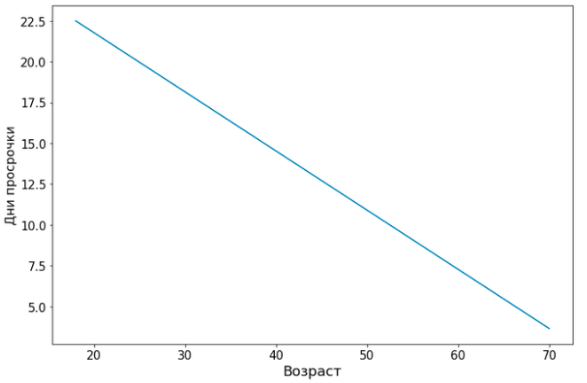

Более точной является визуализация зависимости признаков. С этим подходом мы подробнее познакомимся в следующем юните, посвящённом визуализации связей между признаками.

Для большинства непрерывных признаков это подходящий метод вычисления коэффициента корреляции. Однако при его использовании вы предполагаете, что признаки приблизительно нормально распределены и не имеют выбросов.

НОРМАЛЬНОЕ РАСПРЕДЕЛЕНИЕ

Большинство окружающих нас процессов и явлений, характеристик объектов можно описать нормальным распределением. В основном это переменные, которые зависят от множества факторов, например рост человека. Он сформировался благодаря местности, в которой проживает человек, генетическим предрасположенностям, перенесённым заболеваниям и так далее. Как следствие, показатели роста подвергаются законам нормального распределения.

Если признак является совокупностью очень редких событий, например аварии на дорогах, то распределение признака нормальным не будет.

С точки зрения визуализации нормальное (гауссово) распределение представляет собой распределение признака в виде колокола.

Нормальность распределения признака можно определить визуально, построив гистограмму распределения непрерывного признака или так называемый q-q plot. Подробнее о принципе построения данного графика советуем прочитать здесь https://habr.com/ru/articles/578754/.

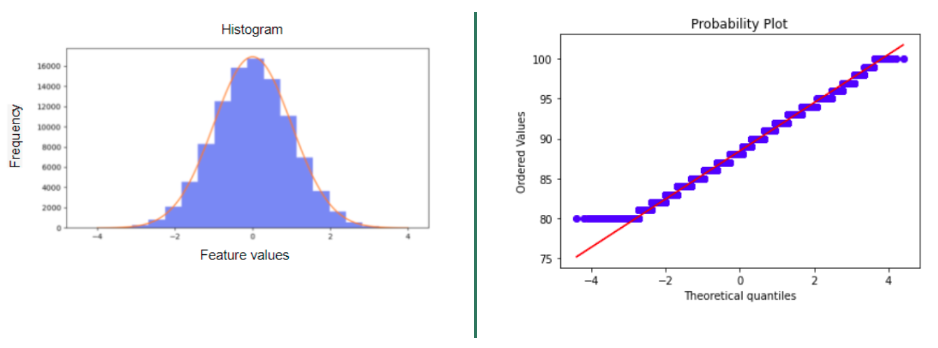

На гистограмме распределение должно напоминать колокол (левый график на рисунке), а q-q plot должен напоминать прямую линию (правый график на рисунке).

Давайте проверим наши данные винных обзоров на нормальность, используя метод визуализации.

Для этого воспользуемся пакетом stats https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats статистических распределений и функций, а также знакомой нам библиотекой matplotlib для построения графиков.

Код для построения графиков:

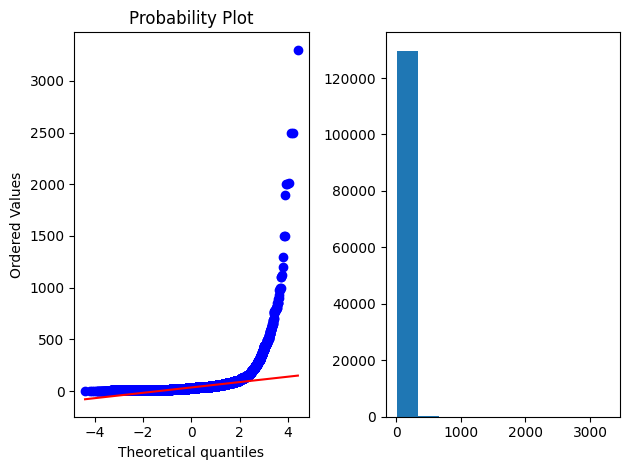

In [41]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['price'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(df['price']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

Кажется, признак распределён ненормально, так как q-q plot имеет изогнутую линию, а гистограмма распределения совершенно не похожа на колокол.

Такой признак при анализе Пирсоном может выдать некорректные результаты. Для таких случаев существуют другие виды корреляций или проводится операция по приведению признака к нормальному путём преобразований, которые вы освоите позже, в юнитах про разведывательный анализ данных.

### Задание 4.2

Постройте приведённые выше графики для признака points из датасета винных обзоров и выберите верное утверждение:

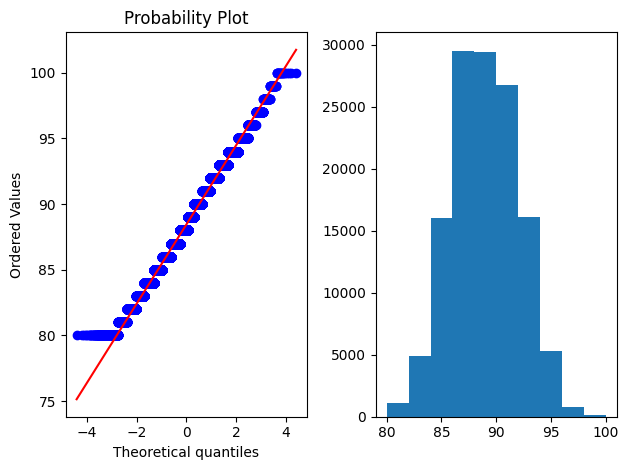

In [42]:
plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['points'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(df['points']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

Признак нормально распределён.

## 5. Типы корреляций. Ранговые корреляции

В прошлом юните вы узнали, что коэффициент корреляции Пирсона может быть рассчитан для непрерывных нормально распределённых признаков. В этом юните мы рассмотрим методы расчёта для остальных типов признаков.

Ранговая корреляция — это вид корреляции, отражающий отношения переменных, упорядоченных по возрастанию их значения. Ранги — это порядковые номера единиц совокупности в упорядоченном (ранжированном) ряду. Если проранжировать совокупность по двум признакам, связь между которыми изучается, то полное совпадение рангов означает максимально тесную прямую связь, а полная противоположность рангов — максимально тесную обратную связь.

КОРРЕЛЯЦИЯ СПИРМЕНА

Коэффициент корреляции Спирмена используется для вычисления взаимосвязей между категориальными переменными.

Чтобы рассчитать коэффициент корреляции Спирмена, вам необходимо передать в df.corr() аргумент method = 'spearman' .

### Задание 5.1

Рассчитайте коэффициент корреляции Спирмена для признаков point и price. Ответ округлите до сотых.

In [43]:
round(df[{'price', 'points'}].corr('spearman'),2)

C:\Users\artem.truschelev\AppData\Local\Temp\ipykernel_19900\1790153376.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  round(df[{'price', 'points'}].corr('spearman'),2)


,points,price
points,1.00,0.58
price,0.58,1.00


Но разве мы не допустили ошибку, рассчитав коэффициент корреляции Спирмена для числового признака, а не категориального? 

Не совсем. Иногда мы можем применить ранговую корреляцию и для числовых переменных, которые распределены ненормально или если между ними существует нелинейная связь. 

Лучшим вариантом будет придерживаться правил корреляций каждого из методов: для непрерывных нормально распределённых используем корреляцию Пирсона, для категориальных — ранговую. Однако в спорных случаях мы рассматриваем несколько вариантов корреляций. 

Например, в нашем случае один из признаков price распределён ненормально, связь между ними также не является линейной. Корреляция по Пирсону составляет 0.4, что говорит о слабой связи признаков. А корреляция по Спирмену составляет 0.58, что говорит о более сильной связи. 

Скорее всего, корреляция Спирмена в данном случае будет более верным вариантом, но для точного ответа нам необходимо будет удовлетворить условиям корреляции Спирмена или корреляции Пирсона. Для этого будут необходимы преобразования, которые мы изучим в следующих модулях EDA.

Так же, как и коэффициент Пирсона, коэффициент Спирмена распределён [-1; 1] с такой же интерпретацией силы связи, рассмотренной нами в предыдущих юнитах.

Для ранговой корреляции существует ещё один метод расчёта — корреляция Кендалла.

КОРРЕЛЯЦИЯ КЕНДАЛЛА

Так же, как и корреляция Спирмена, корреляция Кендала предусмотрена для нахождения взаимосвязей между категориальными переменными. Для расчёта коэффициента корреляции Кендалла необходимо передать в изученный нами метод df.corr() аргумент method = 'kendall'. 

### Задание 5.2

Рассчитайте коэффициент корреляции Кендалла для признаков point и price. Ответ округлите до сотых.

In [44]:
round(df[{'price', 'points'}].corr('kendall'),2)

C:\Users\artem.truschelev\AppData\Local\Temp\ipykernel_19900\1498930364.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  round(df[{'price', 'points'}].corr('kendall'),2)


,points,price
points,1.00,0.43
price,0.43,1.00


Корреляции Спирмена и Кендалла очень похожи. Чтобы понять их различия, необходимо глубокое погружение в их математическую природу. Однако в среднем корреляция Кендала выдаёт меньшие значения коэффициента корреляции, чем корреляция Спирмена. 

В нашем случае корреляция Кендалла равна 0.43 при коэффициенте корреляции Спирмена 0.58, однако она всё так же выше коэффициента корреляции Пирсона, что говорит о большей связи, чем в вычислении по Пирсону.

Корреляция Кендалла более устойчива к ошибкам и выбросам в данных. Это значит, что её можно применить до очистки данных, чтобы выявить взаимосвязи заранее. Применение в этом случае корреляции Спирмена, как и корреляции Пирсона, не вызовет ошибки, но, скорее всего, некорректность расчёта приведёт к неверным выводам.

В нашем случае корреляционный анализ показал нам явную связь цены за бутылку вина с её рейтингом. Она не является такой сильной связью, чтобы вызывать мультиколлинеарность. Также мы по-прежнему не можем сказать, что цена и рейтинг связаны напрямую, ведь корреляция не даёт нам причинно-следственных связей. Возможно, есть третья переменная, влияющая на эти оба признака.

Даже такой грубый анализ без учёта всех условий для корреляций может быть полезен и позволяет сделать предварительные выводы для дальнейшей работы с признаками.

КОРРЕЛЯЦИЯ МЭТЬЮСА

Бинарные признаки являются подгруппой категориальных. Мы по-прежнему можем использовать методы ранговых корреляций для расчёта связи между переменными. 

Кроме этого, существует корреляция Мэтьюса — мера силы связи между бинарными переменными.

В df.corr() нет расчёта для корреляции Мэтьюса, но мы можем воспользоваться библиотекой scikit-learn и её функцией matthews_corrcoef https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html#sklearn.metrics.matthews_corrcoef() для расчёта коэффициента корреляции Мэтьюса.

scikit-learn — это библиотека с реализацией готовых алгоритмов для машинного обучения. Более подробно вы познакомитесь с ней в модулях, посвящённых машинному обучению.

Для начала установим библиотеку scikit-learn.

pip install scikit-learn
Затем импортируем нужную нам функцию для дальнейшей работы.

from sklearn.metrics import matthews_corrcoef
В нашем датасете винных обзоров нет бинарных переменных, но мы можем воспользоваться учебным примером.

Пример. Создадим два случайных признака x, y и зададим им бинарные значения.

In [45]:
# %pip install scikit-learn

In [46]:
from sklearn.metrics import matthews_corrcoef

In [47]:
from sklearn.metrics import matthews_corrcoef

x = [+1, -1, +1, +1] # список значений признака х
y = [+1, +1, +1, -1] # список значений признака y

matthews_corrcoef(x, y) # рассчитаем коэффициент корреляции Мэтьюса

-0.3333333333333333

### Задание 5.3

Выполните приведённый выше код и выпишите получившееся значение коэффициента корреляции Мэтьюса. Округлите ответ до сотых.

In [48]:
from sklearn.metrics import matthews_corrcoef

x = [+1, -1, +1, +1] # список значений признака х
y = [+1, +1, +1, -1] # список значений признака y

round(matthews_corrcoef(x, y),2) # рассчитаем коэффициент корреляции Мэтьюса

-0.33

Коэффициент корреляции Мэтьюса может быть полезен в случае, когда в датасете представлены только бинарные переменные. Кроме того, этот коэффициент используется для оценки качества моделей, ответы которых также бинарны. 

Например, при предсказании дефолтности клиента у нас может быть только два исхода: 1 — дефолт, 0 — не дефолт. Подробнее об оценке моделей вы узнаете дальше, в модулях, посвящённых машинному обучению.

Итак, этом юните мы узнали о ранговых корреляциях для категориальных признаков, а также о корреляции для бинарных признаков. В следующем юните мы изучим визуализацию корреляций.

## 6. Визуализация корреляций. Матрица корреляций. График рассеивания. Парные отношения в наборе данных

Набор данных содержит ~600 записей о девушках и семь признаков:

BMI — индекс массы тела (ИМТ)  
year — год размещения модели в журнале  
waist — обхват талии модели  
hips — обхват бёдер модели  
height — рост модели  
weight — вес модели  
waist/hip — соотношение обхвата талии и бёдер  
Прочитаем датасет и приступим к изучению способов визуализации.  

In [49]:
data_model = pd.read_csv('data/model.csv')


МАТРИЦА КОРРЕЛЯЦИЙ

В случае большого количества данных в датасете матрица, возвращаемая методом pandas data.corr(), становится нечитаемой.

### Задание 6.1

Постройте матрицу корреляций для датасета. В ответ впишите самый высокий коэффициент корреляции. Ответ округлите до сотых.

Спирмен:

In [51]:
round(data_model.corr(),2)

C:\Users\artem.truschelev\AppData\Local\Temp\ipykernel_19900\1248090317.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  round(data_model.corr(),2)


,Year,Waist,Hips,Height,Weight,BMI,Waist/Hip
Year,1.00,0.29,-0.28,0.28,-0.01,0.03,0.46
Waist,0.29,1.00,0.28,0.37,0.45,0.14,0.74
Hips,-0.28,0.28,1.00,0.23,0.54,0.21,-0.42
Height,0.28,0.37,0.23,1.00,0.71,-0.04,0.20
Weight,-0.01,0.45,0.54,0.71,1.00,0.21,0.07
BMI,0.03,0.14,0.21,-0.04,0.21,1.00,-0.01
Waist/Hip,0.46,0.74,-0.42,0.20,0.07,-0.01,1.00


Матрица получилась большой и потребовалось достаточно много времени, чтобы проанализировать все коэффициенты в этой матрице. А если признаков будет больше? Найти что-то в ней будет практически невозможно.

Поэтому специалисты по данным отдают предпочтение методам визуализации. Один из таких — тепловая матрица корреляций.

ТЕПЛОВАЯ МАТРИЦА КОРРЕЛЯЦИЙ

Для построения такой матрицы нам будет необходима знакомая нам из модуля по визуализации библиотека seaborn.

Импортируем библиотеку для дальнейшего использования:

In [52]:
import seaborn as sns

Для построения тепловой матрицы корреляций мы воспользуемся методом sns.heatmap() https://seaborn.pydata.org/generated/seaborn.heatmap.html библиотеки seaborn. 

Метод принимает на вход двумерный массив данных под аргументом data. Это может быть матрица корреляций, полученная методом df.corr(), матрица пропущенных значений, полученная методом df.isnull(), набор данных и многое другое. 

Передадим в метод heatmap() нашу матрицу корреляций corr():

C:\Users\artem.truschelev\AppData\Local\Temp\ipykernel_19900\2979236682.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_model.corr())


<AxesSubplot: >

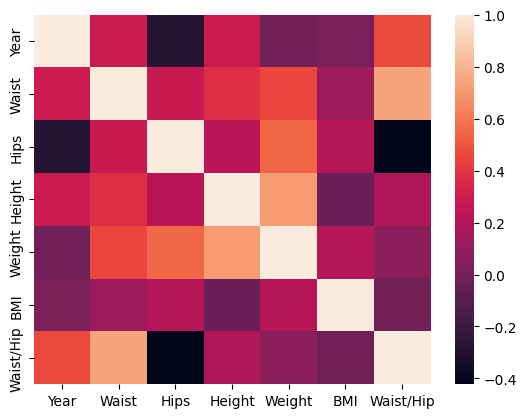

In [53]:
sns.heatmap(data_model.corr())

Чтобы было удобнее её интерпретировать, передадим параметр annot = True, чтобы отобразить коэффициент корреляции на пересечении признаков.

C:\Users\artem.truschelev\AppData\Local\Temp\ipykernel_19900\2129029185.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_model.corr(), annot = True)


<AxesSubplot: >

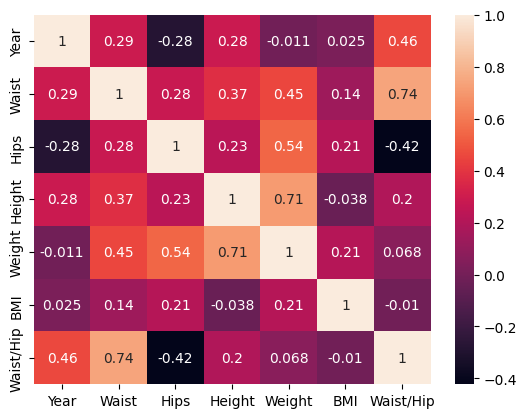

In [54]:
sns.heatmap(data_model.corr(), annot = True)

На горизонтальной и вертикальной осях располагаются названия признаков нашего датасета. По главной диагонали — единицы. Матрица симметрична. Справа от матрицы располагается тепловая шкала коэффициентов корреляции: от минимума -0.42 (это корреляция между признаками waist/hip + hips) и максимума по шкале — 1. 

Такую тепловую матрицу очень удобно интерпретировать: в тёплых светлых оттенках отражена положительная корреляция между признаками, в тёмных холодных — отрицательная корреляция. Например, самая большая отрицательная взаимосвязь составляет -0.42, а самая большая положительная — 0.74.

С помощью такой матрицы очень удобно оценивать мультиколлинеарность в данных, делать выводы о связях между признаками.

Например, в нашем наборе данных мультиколлинеарность практически отсутствует, так как из материала прошлого модуля мы знаем, что она возникает из-за признаков с сильной и очень сильной корреляцией. По шкале корреляций это от 0.7 и выше; у нас есть такие признаки с корреляцией выше 0.7 (например: waist/hip + waist). Коэффициент корреляции лишь немного выше, поэтому такой признак, скорее всего, не будет удалён из набора данных. 

О критериях выбора признаков мы поговорим в следующих модулях разведывательного анализа данных.

Также у метода heatmap имеется много аргументов, которые позволяют настроить цветовую гамму графика, управлять его элементами и отображением. Подробнее об этом вы прочтёте здесь: Seaborn Heatmaps: 13 способов настроить визуализацию матрицы корреляции  https://datastart.ru/blog/read/seaborn-heatmaps-13-sposobov-nastroit-vizualizaciyu-matricy-korrelyacii.

SCATTERPLOT

Иногда нам необходимо рассмотреть связь между признаками как распределение. Матрица корреляции может показать нам только силу связи и её направление (плюс/минус). Чтобы рассмотреть распределение и характер связи, существует точечная диаграмма рассеивания.

Точечная диаграмма рассеивания — это такая диаграмма, в которой каждое значение, которое принимает признак в датасете, отражено точкой.

Подобная диаграмма помогает установить характер и силу связи признаков. Присвоив каждой оси переменную, мы можем определить наличие связи между переменными. Сила связи (коэффициент корреляции) зависит от того, насколько плотно расположены точки на диаграмме. Например, на рисунке слева точки расположены более плотно, чем справа. Это означает большую силу связи. 

Давайте построим такой график на примере нашего датасета и рассмотрим его детально.

Для построения точечной диаграммы рассеивания мы воспользуемся знакомой нам библиотекой seaborn, которой мы пользовались при построении тепловой матрицы корреляции.

Метод, который мы будем использовать, — sns.scatterplot(). Он отражает связь между переменными, где есть аргументы метода x, y, и признаки, которые мы хотим исследовать.

Возьмём для примера две пары признаков:

по оси x="Waist/Hip" — соотношение обхвата талии/бедер, по оси y="Waist" — обхват талии;  
по оси x="Weight" — вес модели, а по оси y="Year" — год размещения модели в журнале.  

Построим для них точечную диаграмму:

<AxesSubplot: xlabel='Waist/Hip', ylabel='Waist'>

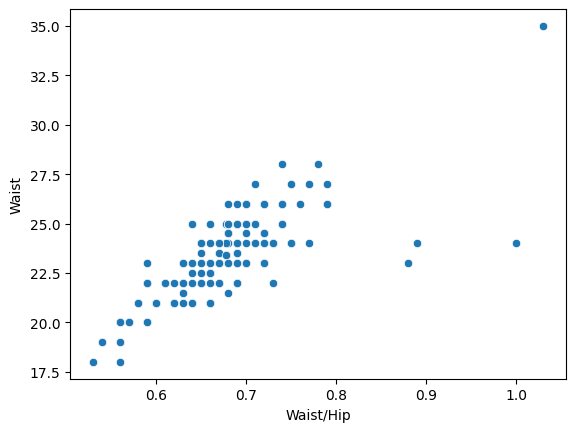

In [57]:
sns.scatterplot(data=data_model, x="Waist/Hip", y="Waist")

где по оси x располагается признак Waist/Hip, а по оси y — признак Waist.

Построим диаграмму для следующей пары признаков и сравним их.

<AxesSubplot: xlabel='Weight', ylabel='Year'>

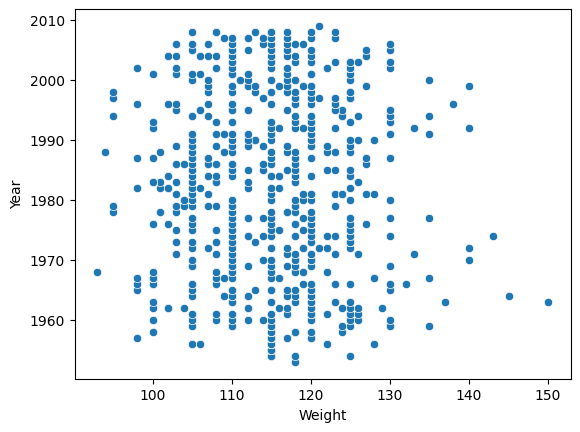

In [59]:
sns.scatterplot(data=data_model, x="Weight", y="Year")

Сравнив эти два графика, мы можем сказать, что в первой паре признаков связь видна более отчётливо, точки больше прижаты друг к другу и выстроены визуально в линию. Эта линия похожа на рассматриваемую нами в прошлом юните линейную связь. Во второй паре признаков они распределены по всему пространству — трудно выявить основную массу признаков, связь кажется очень слабой.

И если мы вернёмся к тепловой матрице корреляций, то увидим, что в первом случае корреляция составила 0.74, а во втором -0.011 — очень слабая связь. Получается, что при помощи графиков мы можем оценить коэффициент корреляции на глаз. 

Умение интерпретировать графики очень важно для дата-сайентиста и сокращает время работы над разведывательным анализом данных. Опытным специалистам по данным требуется несколько секунд, чтобы определить характер связи: линейная/нелинейная, прямая/обратная, — а также силу связи, или коэффициент корреляции. 

Чтобы делать это так же быстро, необходимо помнить несколько правил. Давайте повторим их и закрепим эти знания визуализацией. 

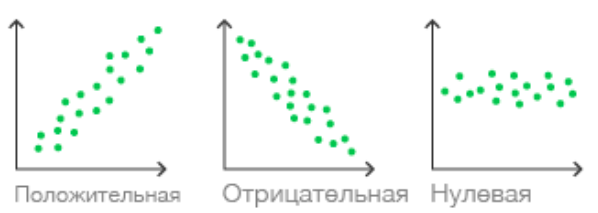

* При положительной корреляции увеличение одного признака приводит к увеличению другого. И наоборот.  
* При отрицательной связи увеличение одного из признаков приводит к уменьшению другого и наоборот.  
* При нулевой корреляции признаки распределяются независимо друг от друга, что видно на рисунке.  

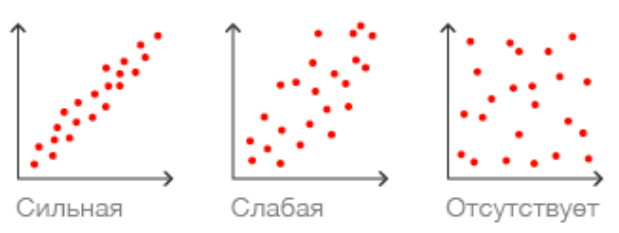

При сильной связи точки на графике расположены близко друг к другу. Чем связь слабее, тем дальше находятся точки друг от друга. На графике изображена сильная связь с коэффициентом корреляции ~0.95, слабая с коэффициентом корреляции ~0.5 и нулевая корреляция.

Диаграмма рассеивания в данных — удобный инструмент анализа, но, к сожалению, только для пары признаков. Тепловая матрица корреляций удобна для анализа всего датасета, но показывает только силу и направления корреляции (плюс/минус), а информации о распределении признаков мы не получаем. 

Существует ли что-то, что объединяет лучшее из этих подходов? Да!

Это график попарных отношений в библиотеке seaborn.

ГРАФИК ПОПАРНЫХ ОТНОШЕНИЙ PAIRPLOT

Давайте построим график PairPlot https://seaborn.pydata.org/generated/seaborn.pairplot.html для нашего набора данных:

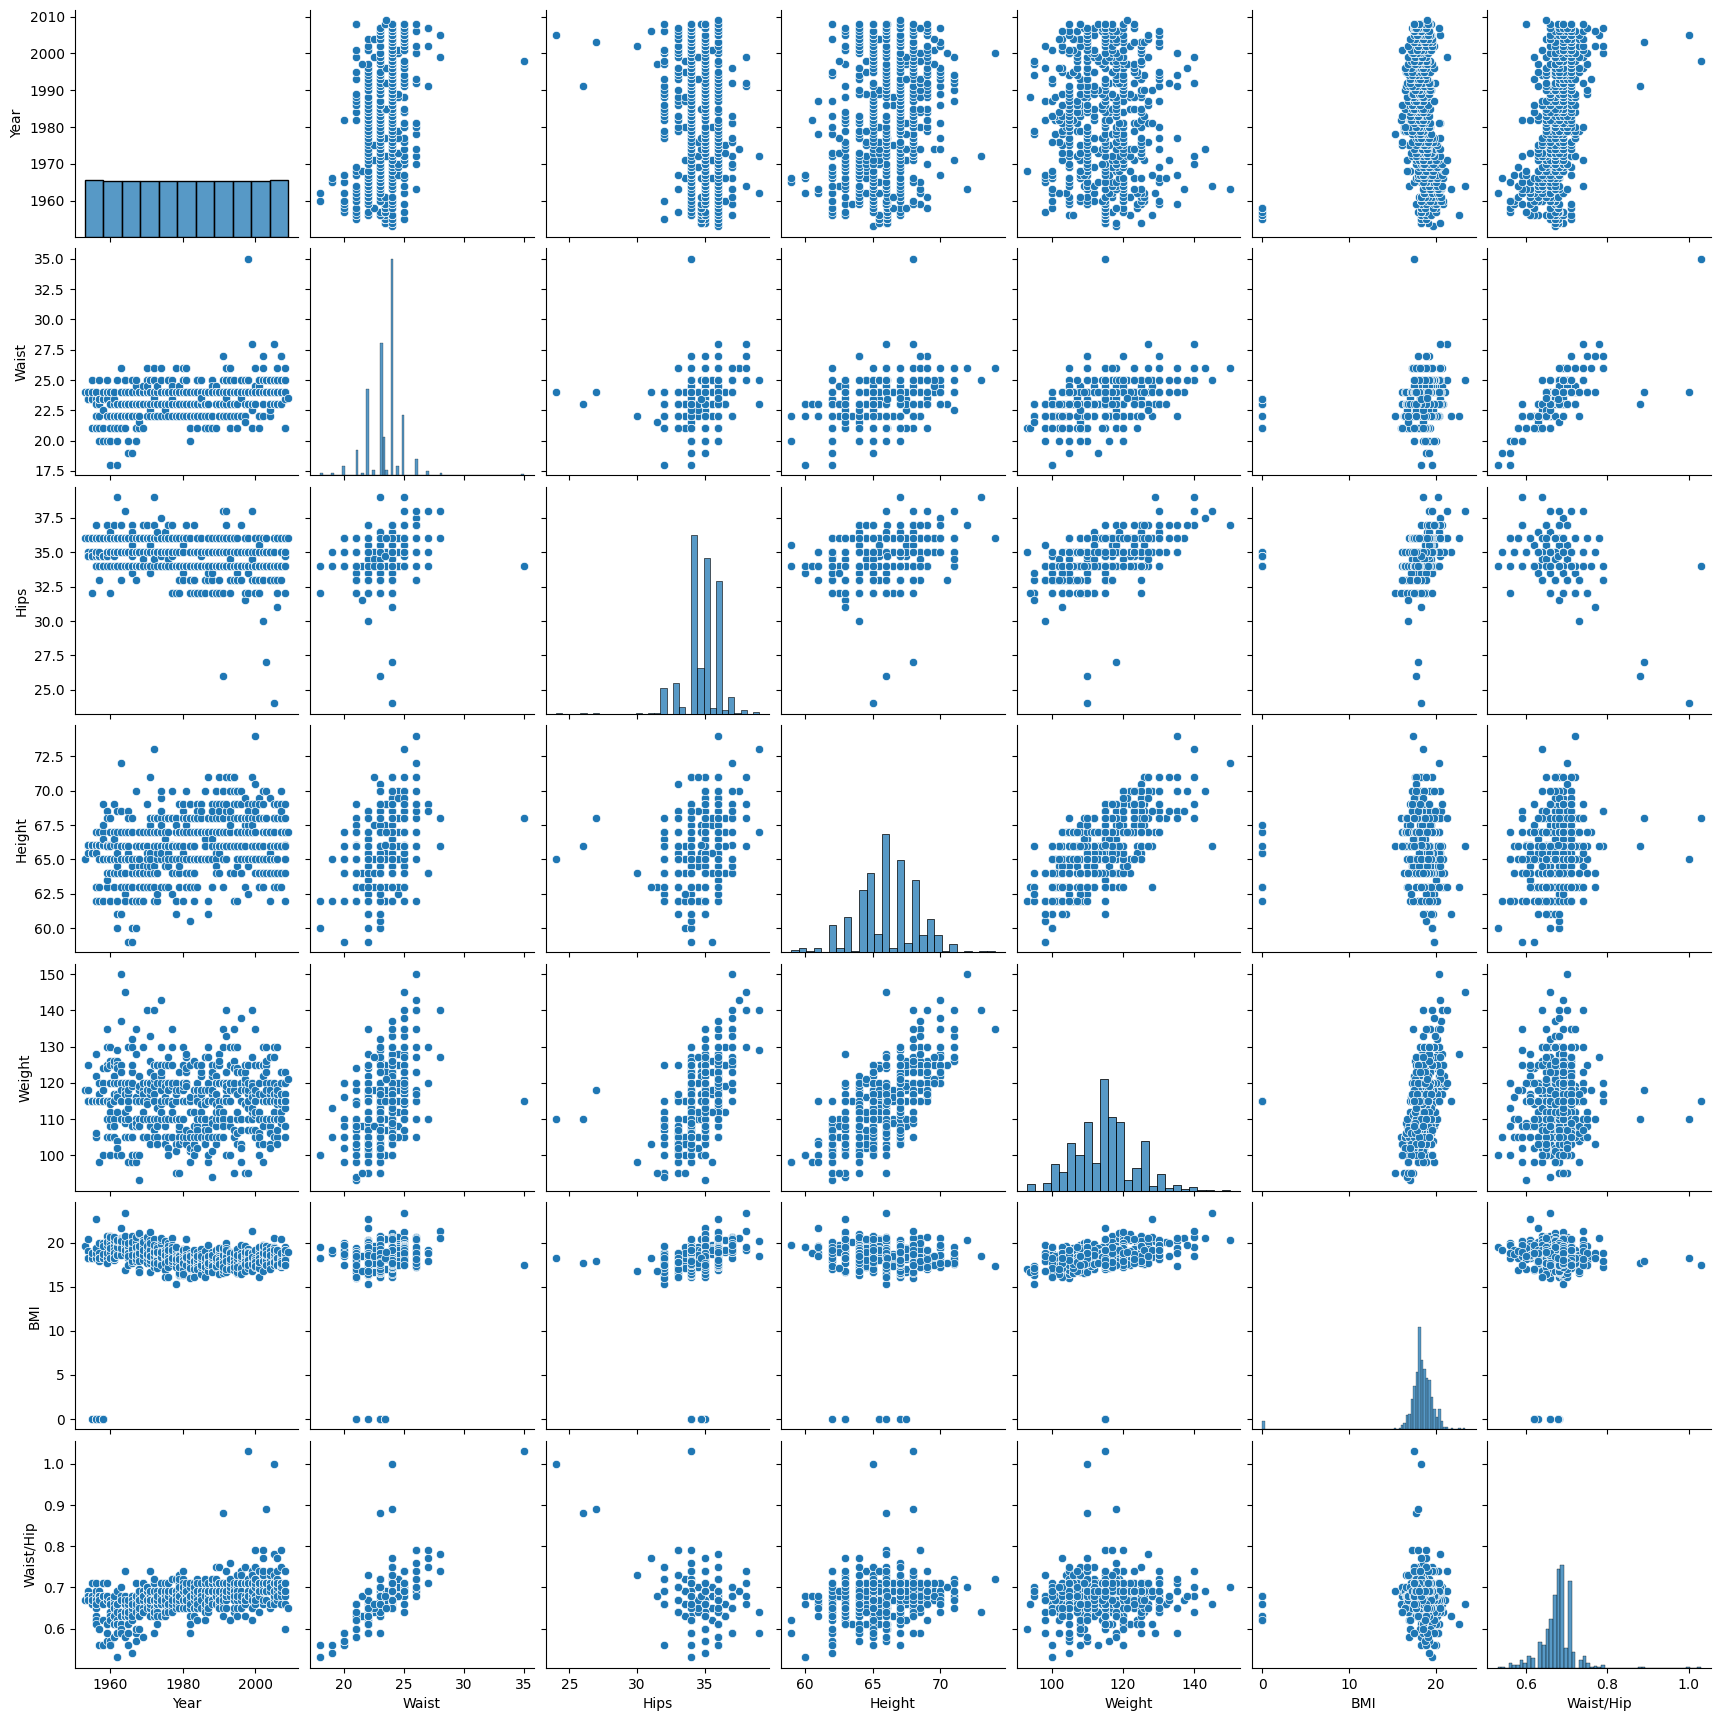

In [60]:
sns.pairplot(data_model)

Структура похожа на изученную нами тепловую матрицу корреляций. На осях х и у расположились признаки из набора данных. На главной диагонали вместо единиц представлены графики-распределения конкретной величины. В остальных ячейках мы можем увидеть точечный график связей признаков между собой — это scatterplot, который мы строили для пары признаков. Здесь это пара признаков, которые пересекаются между собой.

Что мы можем увидеть в таком графике? Признаки weight (вес модели) и height (рост модели) распределены почти нормально, они выделены на рисунке ниже красным кругом. Это видно на графике распределения. 

Из прошлых юнитов мы знаем, что распределение роста и веса заранее будет ожидаемо нормальным. 

Также интересна связь на пересечении двух признаков. Диаграмма рассеяния линейна, вытянута вдоль прямой. Она положительна — с увеличением одной переменной растёт значение другой. Она ближе к сильной связи — точки расположены близко друг к другу. Можно сделать предположение о коэффициенте корреляции примерно ~0,7.



### Задание 6.3

Посчитайте коэффициент корреляции между признаками Weight (вес модели) и Height (рост модели). Ответ округлите до сотых.

In [64]:
round(data_model[{'Weight', 'Height'}].corr(),2)

C:\Users\artem.truschelev\AppData\Local\Temp\ipykernel_19900\2056725920.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  round(data_model[{'Weight', 'Height'}].corr(),2)


,Height,Weight
Height,1.00,0.71
Weight,0.71,1.00


### Задание 7.2

Рассчитайте среднее значение признаков при помощи библиотеки statistics для признаков weight и height. Ответ округлите до сотых.

In [67]:
round(statistics.mean(data_model['Weight']),2)

114.94

In [68]:
round(statistics.mean(data_model['Height']),2)

66.06

### Задание 7.3

Постройте матрицы визуализации корреляций, диаграммы рассеивания, проанализируйте и выполните задание.

Заполните пропуски.

C:\Users\artem.truschelev\AppData\Local\Temp\ipykernel_19900\2129029185.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_model.corr(), annot = True)


<AxesSubplot: >

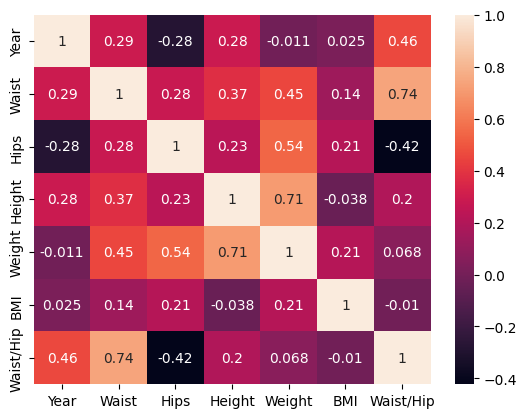

In [69]:
sns.heatmap(data_model.corr(), annot = True)

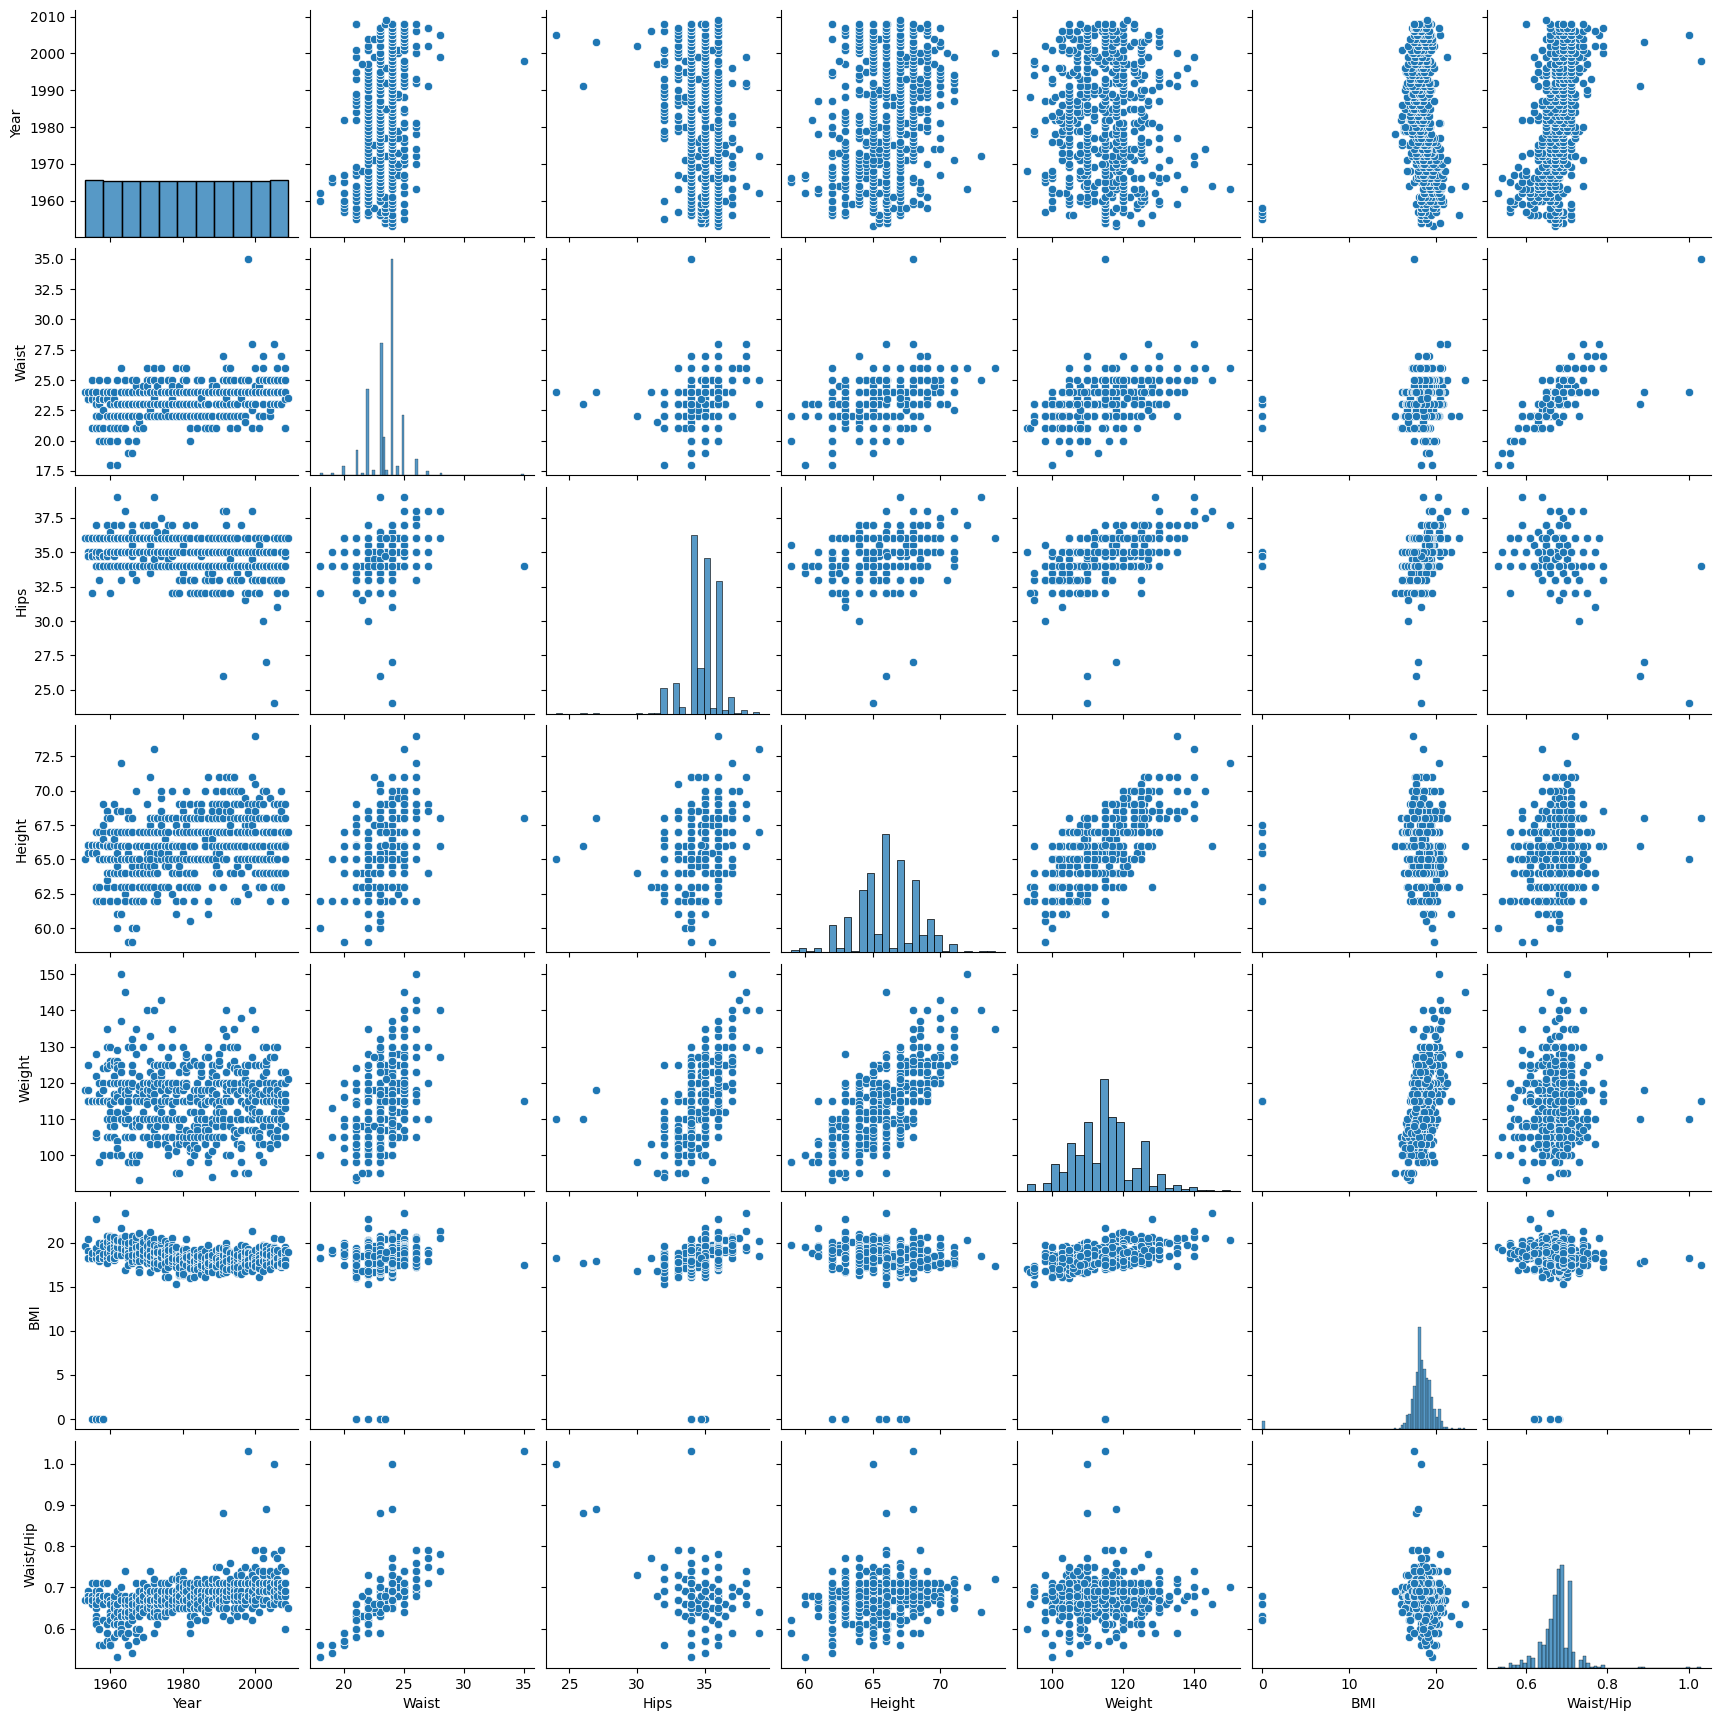

In [70]:
sns.pairplot(data_model)

С увеличением обхвата бедер модели ИМТ незначительно _________ . увеличивается  

Обхват бёдер имеет _________ связь с весом модели. положительную

С увеличением обхвата бёдер _________ вес модели. увеличивается 

Год выпуска журнала и вес модели имеют __________ связь. нулевую  

БОНУС

→ Игра Guess the Correlation https://www.guessthecorrelation.com/

Браузерная игра Guess the Correlation была разработана для понимания корреляции в диаграммах рассеяния. Игрокам показывают диаграммы рассеяния, изображающие взаимосвязь между двумя случайными величинами, и просят угадать, насколько они положительно коррелированы. Выбросы заставляют игроков переоценивать или занижать истинную корреляцию. 